Mapping Change Over Time

In [16]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
# mpl.rc('font',family='MS Gothic')

In [17]:
# 空間データなので geopandas (gpd) でインポート

niigatamesh1= gpd.read_file('data2/mesh/SDDSWS5537')
niigatamesh2= gpd.read_file('data2/mesh/SDDSWS5538')
niigatamesh3= gpd.read_file('data2/mesh/SDDSWS5539')
niigatamesh4= gpd.read_file('data2/mesh/SDDSWS5638')
niigatamesh5= gpd.read_file('data2/mesh/SDDSWS5639')
niigatamesh6= gpd.read_file('data2/mesh/SDDSWS5738')
niigatamesh7= gpd.read_file('data2/mesh/SDDSWS5739')

In [18]:
# combine all four mesh shapes
niigatamesh = gpd.pd.concat([niigatamesh1,niigatamesh2,niigatamesh3,niigatamesh4,niigatamesh5,niigatamesh6,niigatamesh7])

<Axes: >

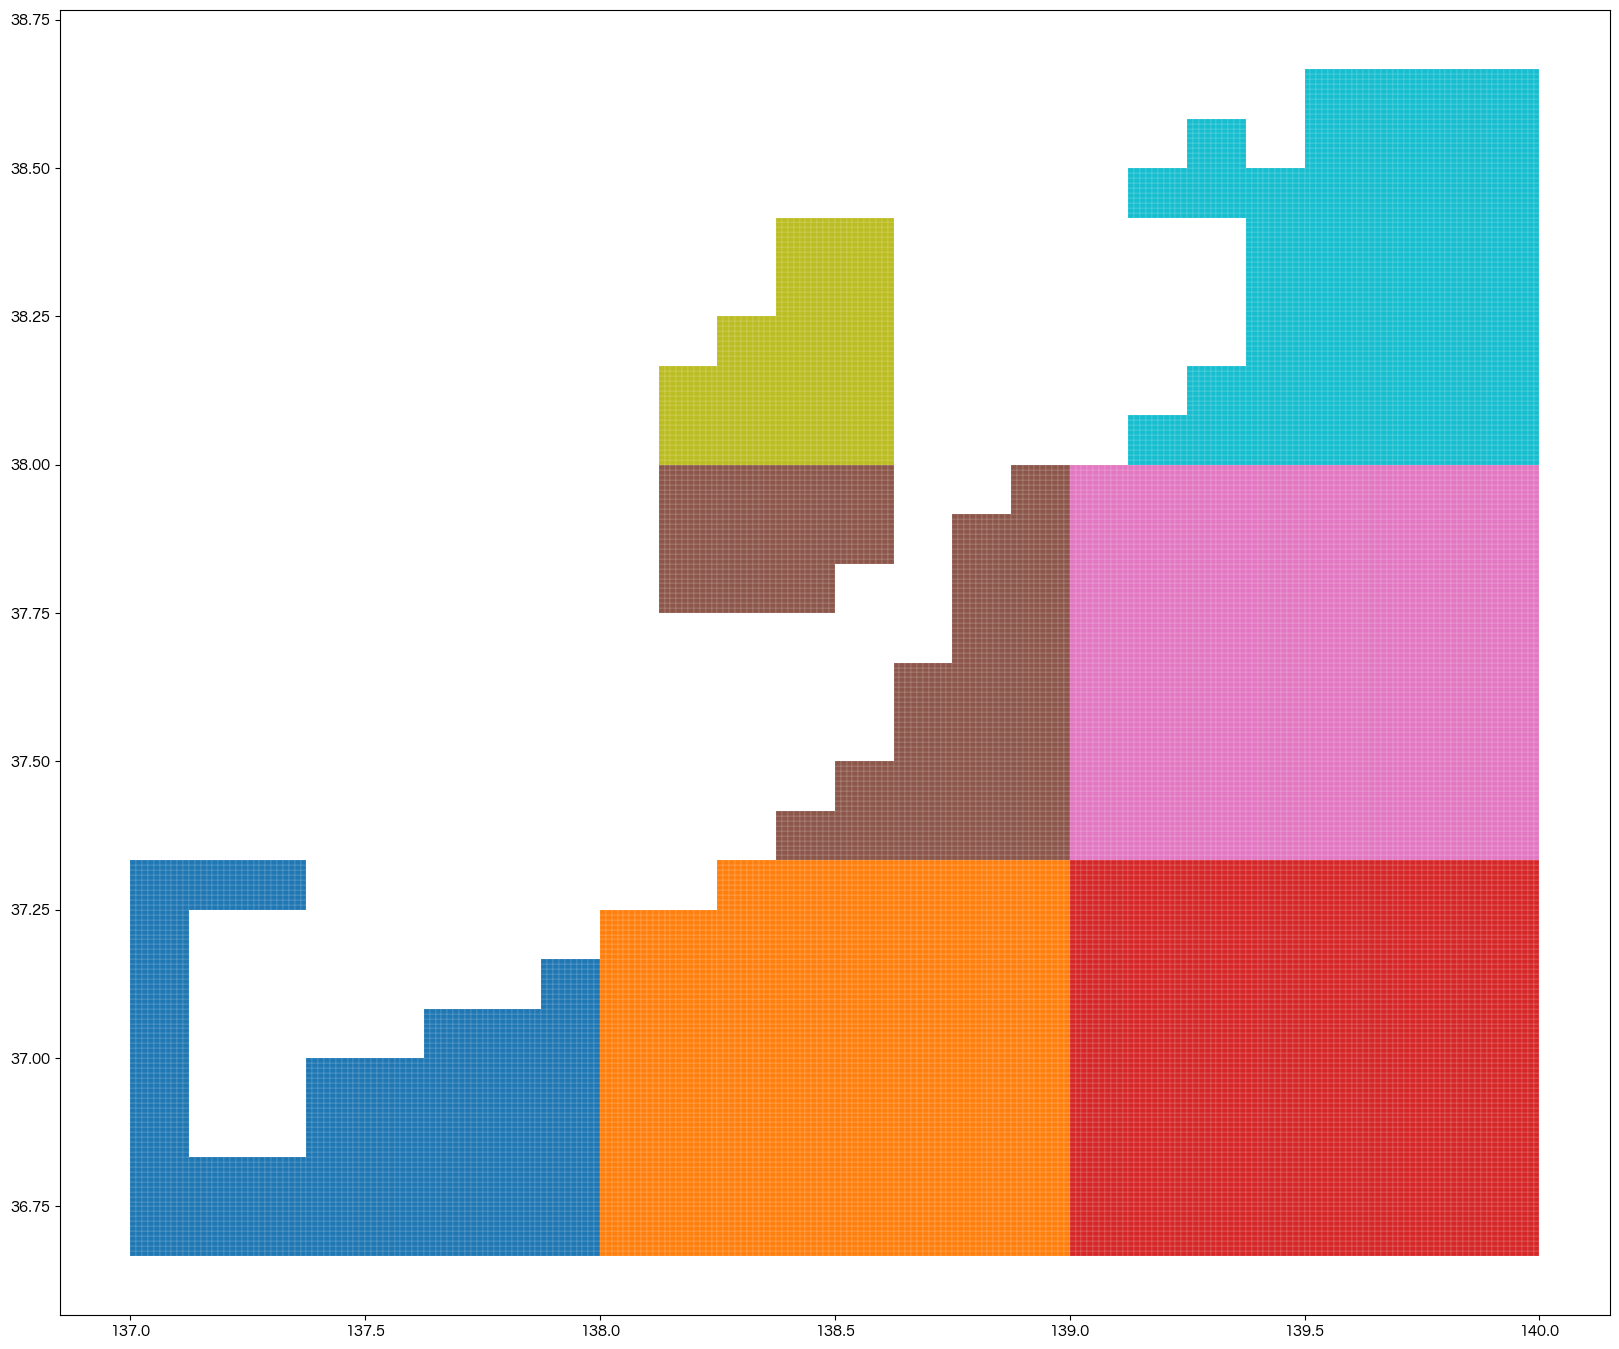

In [19]:
# quick plot
niigatamesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1,column='MESH1_ID')

In [20]:
# csvデータなので pandas (pd) でインポート
# 文字化け予防のために encoding='cp932' 
#2020年度の人口統計
niigatadata1 = pd.read_csv('data2/2020/tblT001100S5537.txt', encoding='cp932')
niigatadata2 = pd.read_csv('data2/2020/tblT001100S5538.txt', encoding='cp932')
niigatadata3 = pd.read_csv('data2/2020/tblT001100S5539.txt', encoding='cp932')
niigatadata4 = pd.read_csv('data2/2020/tblT001100S5638.txt', encoding='cp932')
niigatadata5 = pd.read_csv('data2/2020/tblT001100S5639.txt', encoding='cp932')
niigatadata6 = pd.read_csv('data2/2020/tblT001100S5738.txt', encoding='cp932')
niigatadata7 = pd.read_csv('data2/2020/tblT001100S5739.txt', encoding='cp932')

In [21]:
#2015年度の人口統計
niigatadata8 = pd.read_csv('data2/2015/tblT000846S5537.txt', encoding='cp932')
niigatadata9 = pd.read_csv('data2/2015/tblT000846S5538.txt', encoding='cp932')
niigatadata10= pd.read_csv('data2/2015/tblT000846S5539.txt', encoding='cp932')
niigatadata11= pd.read_csv('data2/2015/tblT000846S5638.txt', encoding='cp932')
niigatadata12= pd.read_csv('data2/2015/tblT000846S5639.txt', encoding='cp932')
niigatadata13= pd.read_csv('data2/2015/tblT000846S5738.txt', encoding='cp932')
niigatadata14= pd.read_csv('data2/2015/tblT000846S5739.txt', encoding='cp932')

データの修正
niigatadata1-7:2020年度国勢調査
niigatadata8-14:2015年度国勢調査

In [22]:
# check data
niigatadata5.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T001100001,T001100002,T001100003,T001100004,T001100005,T001100006,...,T001100041,T001100042,T001100043,T001100044,T001100045,T001100046,T001100047,T001100048,T001100049,T001100050
0,NaN,NaN,NaN,NaN,人口（総数）,人口（総数） 男,人口（総数） 女,０～１４歳人口 総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯数 一般世帯数,７人以上世帯数 一般世帯数,親族のみの世帯数 一般世帯数,核家族世帯数 一般世帯数,核家族以外の世帯数 一般世帯数,６歳未満世帯員のいる世帯数 一般世帯数,６５歳以上世帯員のいる世帯数 一般世帯数,世帯主の年齢が２０～２９歳の１人世帯数 一般世帯数,高齢単身世帯数 一般世帯数,高齢夫婦世帯数 一般世帯数
1,56390002.0,0.0,NaN,NaN,44,18,26,2,1,1,...,0,0,13,10,3,2,15,0,4,4
2,56390003.0,0.0,NaN,NaN,83,38,45,1,1,0,...,0,0,27,17,10,0,32,0,7,7
3,56390007.0,1.0,NaN,56390017,16,8,8,0,0,0,...,0,0,8,7,1,0,8,0,1,3
4,56390009.0,1.0,NaN,56390019,12,5,7,0,0,0,...,0,0,5,4,1,0,8,0,4,1


In [24]:
# ４つのテーブルから１行目を削除
niigatadata1=niigatadata1[1:]
niigatadata2=niigatadata2[1:]
niigatadata3=niigatadata3[1:]
niigatadata4=niigatadata4[1:]
niigatadata5=niigatadata5[1:]
niigatadata6=niigatadata6[1:]
niigatadata7=niigatadata7[1:]


In [25]:
# ４つのテーブルから１行目を削除
niigatadata8=niigatadata8[1:]
niigatadata9=niigatadata9[1:]
niigatadata10=niigatadata10[1:]
niigatadata11=niigatadata11[1:]
niigatadata12=niigatadata12[1:]
niigatadata13=niigatadata13[1:]
niigatadata14=niigatadata14[1:]


In [26]:
# ４つのテーブルから「＊」を非数に置き換える
niigatadata1 = niigatadata1.replace('*',np.nan)
niigatadata2 = niigatadata2.replace('*',np.nan)
niigatadata3 = niigatadata3.replace('*',np.nan)
niigatadata4 = niigatadata4.replace('*',np.nan)
niigatadata5 = niigatadata5.replace('*',np.nan)
niigatadata6 = niigatadata6.replace('*',np.nan)
niigatadata7 = niigatadata7.replace('*',np.nan)

In [27]:
# ４つのテーブルから「＊」を非数に置き換える
niigatadata8 = niigatadata8.replace('*',np.nan)
niigatadata9 = niigatadata9.replace('*',np.nan)
niigatadata10 = niigatadata10.replace('*',np.nan)
niigatadata11 = niigatadata11.replace('*',np.nan)
niigatadata12 = niigatadata12.replace('*',np.nan)
niigatadata13 = niigatadata13.replace('*',np.nan)
niigatadata14 = niigatadata14.replace('*',np.nan)

In [28]:
niigatadata2020 = pd.concat([niigatadata1,niigatadata2,niigatadata3,niigatadata4,niigatadata5,niigatadata6,niigatadata7,])

In [29]:
niigatadata2015 = pd.concat([niigatadata8,niigatadata9,niigatadata10,niigatadata11,niigatadata12,niigatadata13,niigatadata14,])

In [30]:
# get rid of HTKSYORI, HTKSAKI, GASSAN
niigatadata2015=niigatadata2015.drop("HTKSYORI",axis=1)
niigatadata2015=niigatadata2015.drop("HTKSAKI",axis=1)
niigatadata2015=niigatadata2015.drop("GASSAN",axis=1)

In [31]:
# get rid of HTKSYORI, HTKSAKI, GASSAN
niigatadata2020=niigatadata2020.drop("HTKSYORI",axis=1)
niigatadata2020=niigatadata2020.drop("HTKSAKI",axis=1)
niigatadata2020=niigatadata2020.drop("GASSAN",axis=1)

In [32]:
# combine 2015 and 2020 data/
niigatadata = pd.merge(niigatadata2020,niigatadata2015,on='KEY_CODE')

In [33]:
# check data info
niigatadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9490 entries, 0 to 9489
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    9490 non-null   float64
 1   T001100001  9490 non-null   object 
 2   T001100002  9490 non-null   object 
 3   T001100003  9490 non-null   object 
 4   T001100004  8389 non-null   object 
 5   T001100005  8389 non-null   object 
 6   T001100006  8389 non-null   object 
 7   T001100007  8389 non-null   object 
 8   T001100008  8389 non-null   object 
 9   T001100009  8389 non-null   object 
 10  T001100010  8389 non-null   object 
 11  T001100011  8389 non-null   object 
 12  T001100012  8389 non-null   object 
 13  T001100013  8389 non-null   object 
 14  T001100014  8389 non-null   object 
 15  T001100015  8389 non-null   object 
 16  T001100016  8389 non-null   object 
 17  T001100017  8389 non-null   object 
 18  T001100018  8389 non-null   object 
 19  T001100019  8389 non-null  

In [34]:
# まずはカラムをアウトプット
niigatadata.columns

Index(['KEY_CODE', 'T001100001', 'T001100002', 'T001100003', 'T001100004',
       'T001100005', 'T001100006', 'T001100007', 'T001100008', 'T001100009',
       'T001100010', 'T001100011', 'T001100012', 'T001100013', 'T001100014',
       'T001100015', 'T001100016', 'T001100017', 'T001100018', 'T001100019',
       'T001100020', 'T001100021', 'T001100022', 'T001100023', 'T001100024',
       'T001100025', 'T001100026', 'T001100027', 'T001100028', 'T001100029',
       'T001100030', 'T001100031', 'T001100032', 'T001100033', 'T001100034',
       'T001100035', 'T001100036', 'T001100037', 'T001100038', 'T001100039',
       'T001100040', 'T001100041', 'T001100042', 'T001100043', 'T001100044',
       'T001100045', 'T001100046', 'T001100047', 'T001100048', 'T001100049',
       'T001100050', 'T000846001', 'T000846002', 'T000846003', 'T000846004',
       'T000846005', 'T000846006', 'T000846007', 'T000846008', 'T000846009',
       'T000846010', 'T000846011', 'T000846012', 'T000846013', 'T000846014',
 

In [35]:
# 1番目以降をアウトプット
niigatadata.columns[1:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050',
       'T000846001', 'T000846002', 'T000846003', 'T000846004', 'T000846005',
       'T000846006', 'T000846007', 'T000846008', 'T000846009', 'T000846010',
       'T000846011', 'T000846012', 'T000846013', 'T000846014', 'T000846015',

In [36]:
# 元のデータを入れ替える
niigatadata[niigatadata.columns[1:]]=niigatadata[niigatadata.columns[1:]].astype(float)

In [37]:
# check!
niigatadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9490 entries, 0 to 9489
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    9490 non-null   float64
 1   T001100001  9490 non-null   float64
 2   T001100002  9490 non-null   float64
 3   T001100003  9490 non-null   float64
 4   T001100004  8389 non-null   float64
 5   T001100005  8389 non-null   float64
 6   T001100006  8389 non-null   float64
 7   T001100007  8389 non-null   float64
 8   T001100008  8389 non-null   float64
 9   T001100009  8389 non-null   float64
 10  T001100010  8389 non-null   float64
 11  T001100011  8389 non-null   float64
 12  T001100012  8389 non-null   float64
 13  T001100013  8389 non-null   float64
 14  T001100014  8389 non-null   float64
 15  T001100015  8389 non-null   float64
 16  T001100016  8389 non-null   float64
 17  T001100017  8389 non-null   float64
 18  T001100018  8389 non-null   float64
 19  T001100019  8389 non-null  

In [38]:
# KEY_CODEをfloatに
niigatamesh['KEY_CODE']=niigatamesh['KEY_CODE'].astype(float)

In [39]:
# merge the data
niigatamesh = niigatamesh.merge(niigatadata, on='KEY_CODE')

In [40]:
# reproject to 3857 (web mercator)
niigatamesh = niigatamesh.to_crs(3857)

<Axes: >

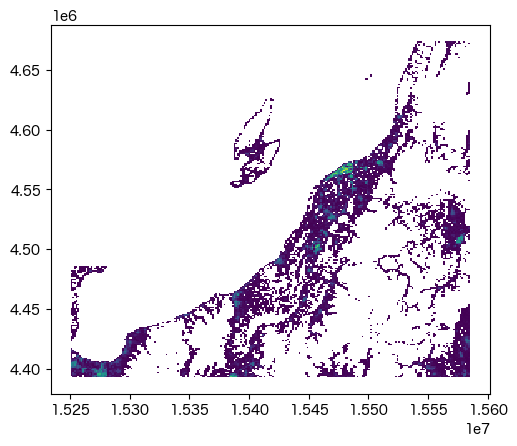

In [41]:
# make a quick plot
niigatamesh.plot(column='T001100001')

<Axes: >

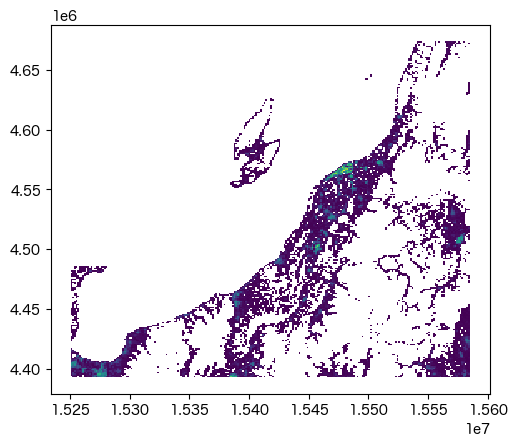

In [42]:
# make a quick plot
niigatamesh.plot(column='T000846001')

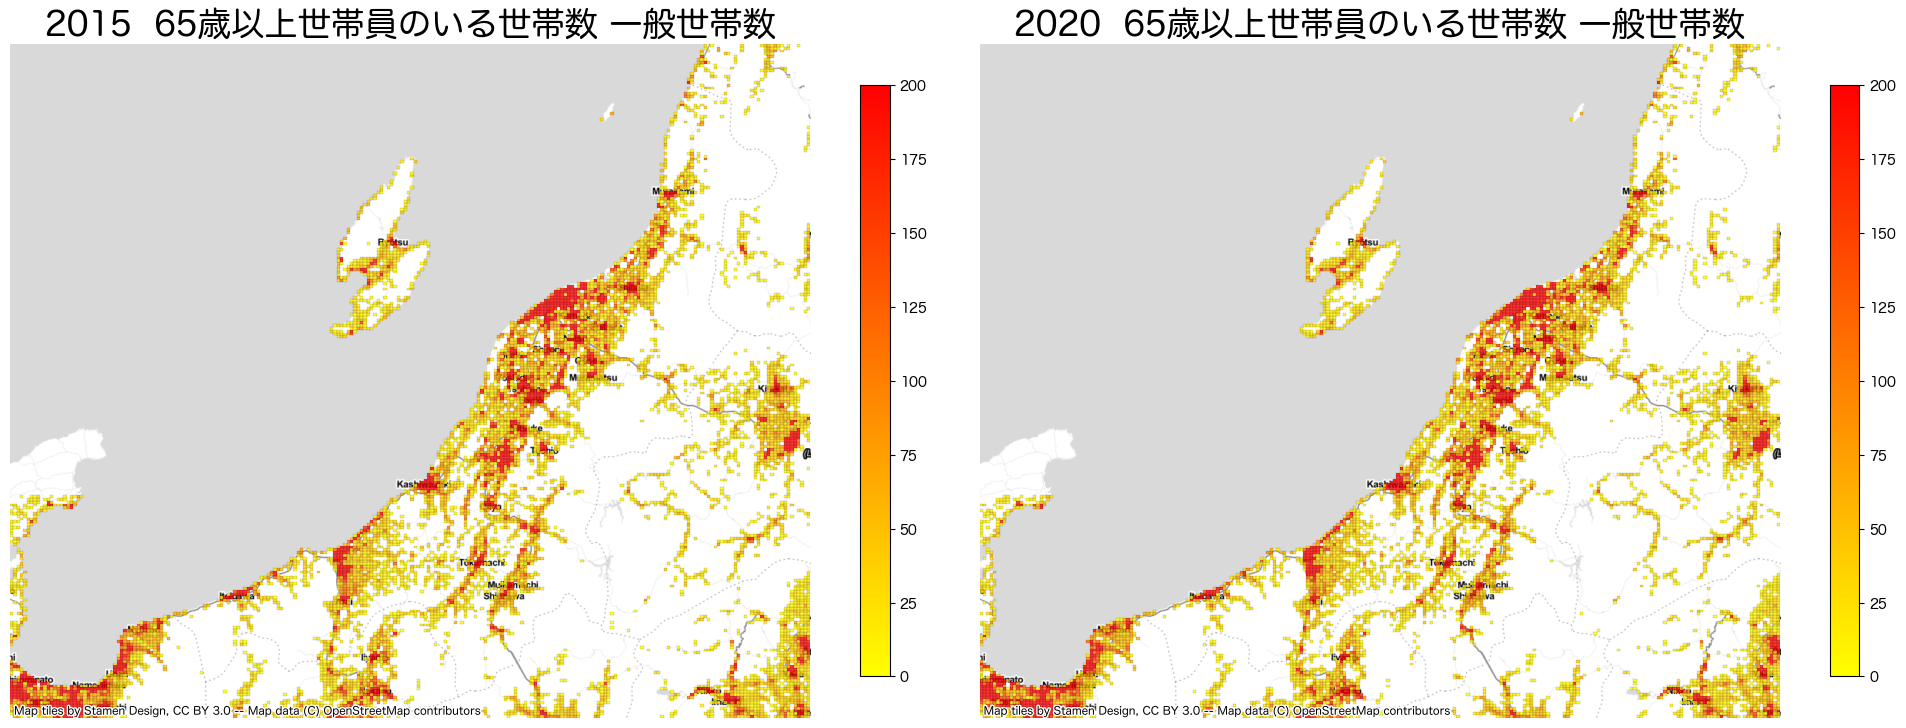

In [48]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
niigatamesh.plot(ax = ax[0], # 左のマップ
    column='T000846038',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=200)

# 2020 population
niigatamesh.plot(ax = ax[1], # 右のマップ
    column='T001100047',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=200)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015  65歳以上世帯員のいる世帯数 一般世帯数',fontsize=24); # 左
ax[1].set_title('2020  65歳以上世帯員のいる世帯数 一般世帯数',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = niigatamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右

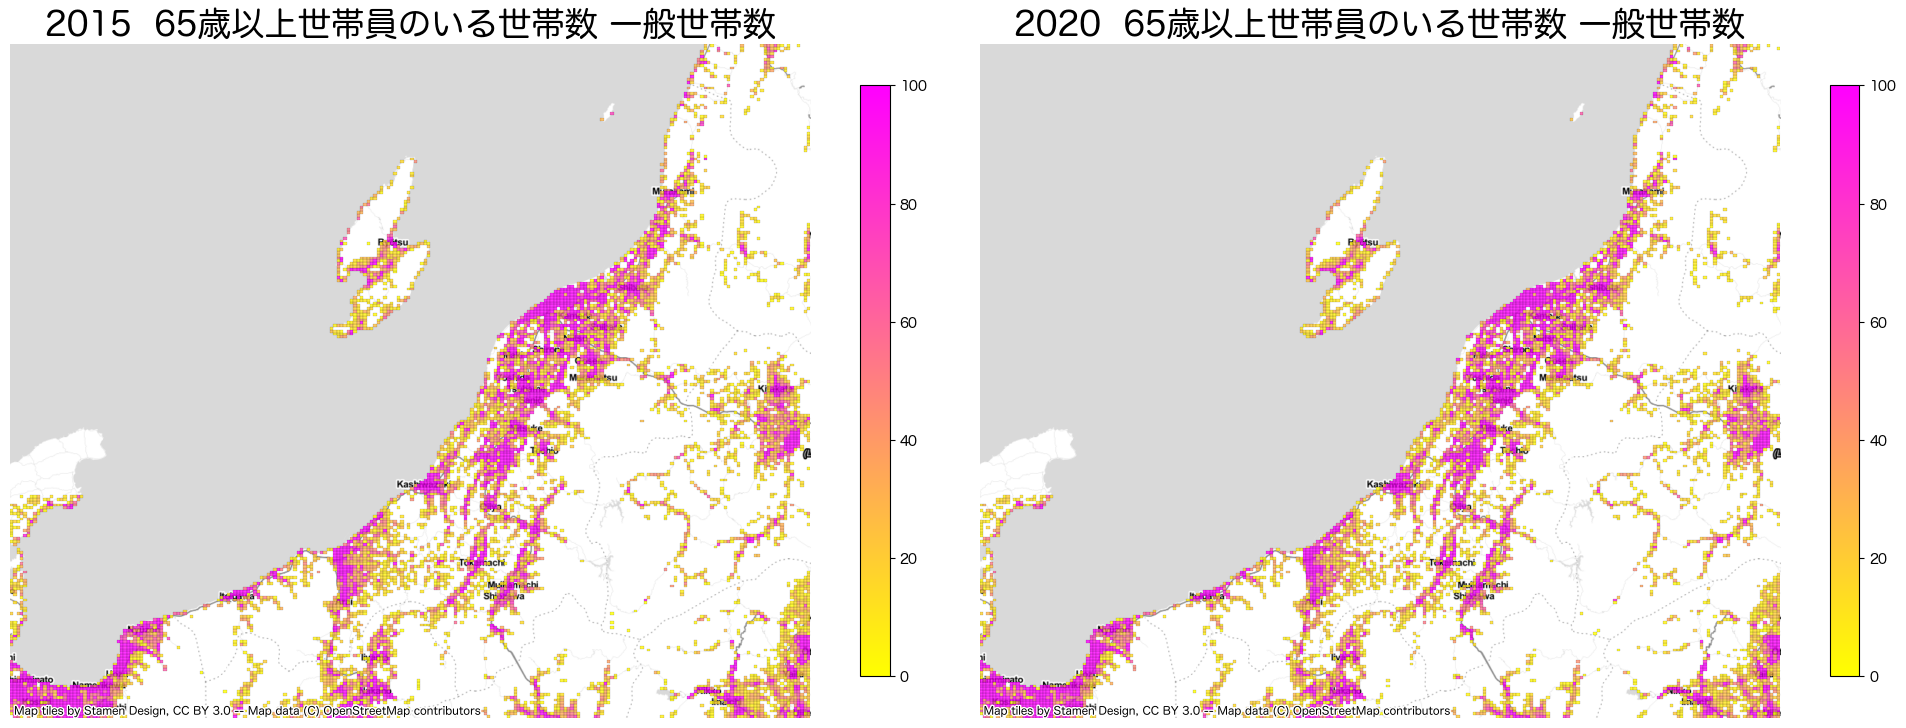

In [51]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
niigatamesh.plot(ax = ax[0], # 左のマップ
    column='T000846038',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='spring_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=100)

# 2020 population
niigatamesh.plot(ax = ax[1], # 右のマップ
    column='T001100047',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='spring_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=100)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015  65歳以上世帯員のいる世帯数 一般世帯数',fontsize=24); # 左
ax[1].set_title('2020  65歳以上世帯員のいる世帯数 一般世帯数',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = niigatamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右

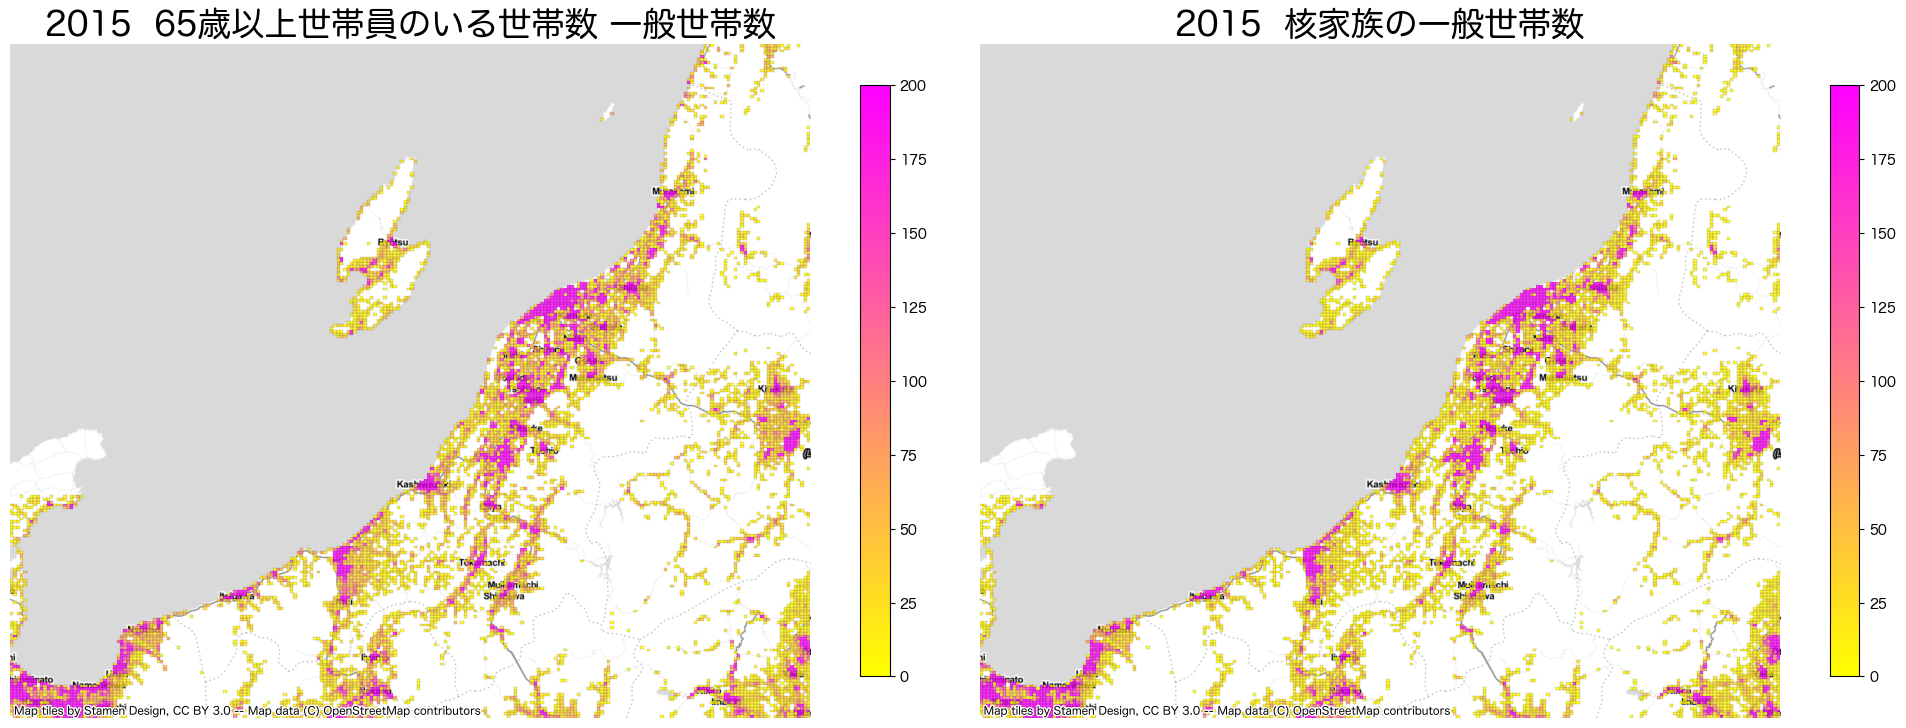

In [54]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
niigatamesh.plot(ax = ax[0], # 左のマップ
    column='T000846038',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='spring_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=200)

# 20１５ population
niigatamesh.plot(ax = ax[1], # 右のマップ
    column='T000846035',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='spring_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=200)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015  65歳以上世帯員のいる世帯数 一般世帯数',fontsize=24); # 左
ax[1].set_title('2015  核家族の一般世帯数',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = niigatamesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右

上の図
祖父母と一緒に暮らさない核家族の増加と65歳以上世帯員のいるを置き、比較してみた。
似たような結果になった為、比較はしやすいがどのような違いがあるのかを判断することが難しかった。
なので１つの図上で色の違い等で比較することができたらもっとみやすいと思った。

感想
地図を隣に置くことができるようになったことで比較をしてみることができるようになった。なので、どのような違いがあるのかなどを一目で見れるようになりわかりやすくなった
